In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive
!mkdir polynomial_data

/content/drive/MyDrive
mkdir: cannot create directory ‘polynomial_data’: File exists


In [ ]:
!pwd

/content/drive/MyDrive


In [ ]:
%cd /content/drive/MyDrive/polynomial_data


/content/drive/MyDrive/polynomial_data


In [ ]:
%cd /content/drive/MyDrive/polynomial_data/Polynomial_train.csv /content/drive/MyDrive/polynomial_data
%cd /content/drive/MyDrive/polynomial_data/Polynomial_test.csv /content/drive/MyDrive/polynomial_data

[Errno 2] No such file or directory: '/content/drive/MyDrive/polynomial_data/Polynomial_train.csv /content/drive/MyDrive/polynomial_data'
/content/drive/MyDrive/polynomial_data
[Errno 2] No such file or directory: '/content/drive/MyDrive/polynomial_data/Polynomial_test.csv /content/drive/MyDrive/polynomial_data'
/content/drive/MyDrive/polynomial_data


In [ ]:
!ls

Polynomial_test.csv  Polynomial_train.csv


In [ ]:
train= pd.read_csv('/content/drive/MyDrive/polynomial_data/Polynomial_train.csv')
test= pd.read_csv('/content/drive/MyDrive/polynomial_data/Polynomial_test.csv')

In [ ]:
train = train.loc[1:4000, :]
train

,Unnamed: 0,X,Y,Z,label
1,1,-1.366446,-3.761945,-8.756162,136.398375
2,2,-4.090270,-1.836218,-1.846066,-310.724813
3,3,-8.730478,-1.923651,3.892972,1.755447
4,4,5.367169,0.358357,6.703989,-343.582590
5,5,-2.124609,-6.995365,6.426205,-674.400414
...,...,...,...,...,...
3996,3996,-2.928809,0.759360,-7.409359,-46.735152
3997,3997,-5.012098,-5.122227,1.072615,-886.196844
3998,3998,-4.111935,0.333718,5.883085,551.120240
3999,3999,-3.280376,-9.030230,5.750285,-1312.024175


In [ ]:
test = test.loc[1:4000, :]
test


,Unnamed: 0,X,Y,Z,label
1,1,2.811964,6.142752,6.419237,-545.362524
2,2,-2.669784,7.775091,-6.931907,-75.044187
3,3,-6.992156,-9.205548,0.852580,-2403.124902
4,4,1.574294,-2.213266,6.029188,8.595325
5,5,4.759625,-5.482463,-9.330643,2035.462985
...,...,...,...,...,...
3996,3996,1.894032,-2.072167,6.882649,14.856035
3997,3997,-9.496490,-4.672709,-6.055123,-1899.285289
3998,3998,-0.741784,1.738715,6.127188,315.081036
3999,3999,-2.511200,-1.057216,-4.162493,-130.468526


In [ ]:
train_Y = train.loc[:,'label']
train_Y = train_Y.to_numpy()
train_Y

array([  136.39837542,  -310.72481348,     1.75544689, ...,
         551.12023996, -1312.02417493,   503.24874597])

In [ ]:
train_X = train.iloc[:, 1:4]
train_X = train_X.to_numpy()
train_X

array([[-1.36644585, -3.76194541, -8.75616193],
       [-4.09026967, -1.83621751, -1.84606561],
       [-8.73047757, -1.92365058,  3.89297218],
       ...,
       [-4.11193485,  0.33371791,  5.88308467],
       [-3.28037595, -9.03022955,  5.75028532],
       [ 0.26446872,  5.30821288,  9.59256533]])

In [ ]:
u = np.ones([np.shape(train_X)[0], 1])
train_X = np.concatenate((u, train_X), axis = 1)
print(np.shape(train_X))
train_Y

(4000, 4)


array([  136.39837542,  -310.72481348,     1.75544689, ...,
         551.12023996, -1312.02417493,   503.24874597])

In [ ]:
first = np.ones((len(train_Y), 1))
new = np.array_split(train_X, 3 , axis = 1)
print(new[0])

[[ 1.         -1.36644585]
 [ 1.         -4.09026967]
 [ 1.         -8.73047757]
 ...
 [ 1.         -4.11193485]
 [ 1.         -3.28037595]
 [ 1.          0.26446872]]


In [ ]:
for i in range(3):
  for j in range (i , 3):
       degreesec = np.multiply(new[i] , new[j])
       first = np.concatenate(( first, degreesec) , axis = 1)
print(first.shape)

(4000, 10)


In [ ]:
for i in range(3):
  for j in range(0 , 3):
    degreethird = np.multiply(np.square(new[i]) , new[j] )
    first = np.concatenate((first, degreethird), axis = 1)
  first = np.concatenate((first, new[i]) , axis = 1)
print(first.shape)

(4000, 28)


In [ ]:
def grad( X , Y , learningrate , itrn):
  
  m = len(train_Y)
  
  theta = np.zeros( (X.shape[1] , 1) ) # initializing theta

  cost_all = [] 
  
  for i in range( 1, X.shape[1] ):

     mean = np.mean( X[:,i])

     deviate = ( np.amax( X[:,i] ) - np.amin( X[:,i]))

     for j in range(X.shape[0]):

       X[j,i] = ( X[j,i] - mean ) / deviate


  for k in range (Y.size):

    Y[k] =  ( Y[k] - np.mean( Y ) ) / ( np.amax( Y ) - np.amin( Y ))

  for z in range(itrn):
    
    y_probability = np.dot(X, theta)

    cost = (1/(2*m)*np.sum(np.square((y_probability).T - Y )))

    dif = (1/m)*np.dot(X.T , ((y_probability).T - Y).T)
    
    theta = theta - learningrate*dif

    cost_all.append(cost) # updating cost Function list

    # to see if cost is decreasing

    if z % 100 == 0:
        print("Cost is", cost)
   
  return y_probability , cost_all



In [ ]:
itrn = 1000
learningrate = 0.0001

In [ ]:
theta , cost_all = grad(X = train_X ,Y = train_Y , learningrate = learningrate , itrn = itrn)

Cost is 0.003839433691266419
Cost is 0.0038394262889108353
Cost is 0.003839418921476376
Cost is 0.0038394115884248323
Cost is 0.003839404289228426
Cost is 0.0038393970233696006
Cost is 0.0038393897903408257
Cost is 0.003839382589644391
Cost is 0.0038393754207922213
Cost is 0.0038393682833056755


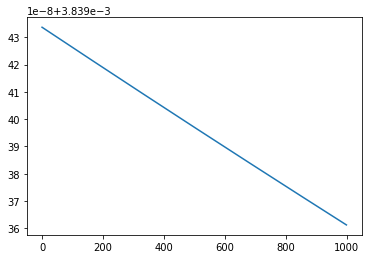

In [ ]:
rng = np.arange(0, itrn)
plt.plot(rng, cost_all)
plt.show()

In [ ]:
test_Y = test.loc[:,'label']
test_Y = test_Y.to_numpy()
test_Y

array([ -545.36252395,   -75.04418664, -2403.12490211, ...,
         315.08103634,  -130.46852642,  -600.72062115])

In [ ]:
test_X = test.iloc[:, 1:4]
test_X = test_X.to_numpy()
test_X

array([[ 2.81196379,  6.14275187,  6.41923694],
       [-2.66978441,  7.77509088, -6.93190696],
       [-6.99215594, -9.20554815,  0.85258047],
       ...,
       [-0.74178384,  1.73871499,  6.12718754],
       [-2.51120005, -1.05721555, -4.16249342],
       [ 7.68952322,  0.50516819,  7.03019601]])

In [ ]:
u = np.ones([np.shape(test_X)[0], 1])
test_X = np.concatenate((u, test_X), axis = 1)
print(np.shape(test_X))
test_Y

(4000, 4)


array([ -545.36252395,   -75.04418664, -2403.12490211, ...,
         315.08103634,  -130.46852642,  -600.72062115])

In [ ]:
first_d = np.ones((len(test_Y), 1))
new_arr = np.array_split(test_X, 3 , axis = 1)
print(new_arr[0])

[[ 1.          2.81196379]
 [ 1.         -2.66978441]
 [ 1.         -6.99215594]
 ...
 [ 1.         -0.74178384]
 [ 1.         -2.51120005]
 [ 1.          7.68952322]]


In [ ]:
for i in range(3):
  for j in range (i , 3):
       degreesecond = np.multiply(new_arr[i] , new_arr[j])
       first_d= np.concatenate(( first_d, degreesec) , axis = 1)
print(first_d.shape)

(4000, 7)


In [ ]:
for i in range(3):
  for j in range(0 , 3):
    degreethree = np.multiply(np.square(new_arr[i]) , new_arr[j] )
    first_d = np.concatenate((first_d, degreethree), axis = 1)
  first_d= np.concatenate((first_d, new[i]) , axis = 1)
print(first_d.shape)

(4000, 25)


In [ ]:
itrn = 1000
learningrate = 0.00005

In [ ]:
y_probability , cost_all = grad(X = test_X ,Y = test_Y , learningrate = learningrate , itrn = itrn)

Cost is 0.004656108255192812
Cost is 0.004656105663792545
Cost is 0.0046561030760458415
Cost is 0.004656100491934901
Cost is 0.004656097911442079
Cost is 0.004656095334549893
Cost is 0.0046560927612410204
Cost is 0.004656090191498297
Cost is 0.004656087625304707
Cost is 0.004656085062643396


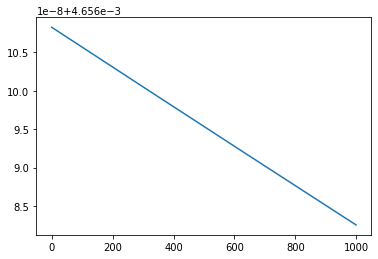

In [ ]:
rng = np.arange(0, itrn)
plt.plot(rng, cost_all)
plt.show()

In [ ]:
error = (1/4000)*(np.sum((np.abs(y_probability).T - test_Y) / np.abs(test_Y)))
print(error*100 , "%")

4.222829429749244 %
